<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/DeapLearning_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top= False,
                  input_shape=(150,150,3)
)
conv_base.summary()

Using TensorFlow backend.






58892288/58889256 [==============================] - 6s 0us/step


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
________________________________________________________

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-10-04 09:37:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  87.9MB/s    in 0.7s    

2019-10-04 09:37:48 (87.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import zipfile
with zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [0]:
import os
import shutil

#shutil.rmtree('/content/cats_and_dogs_small/')
dataset_dir = '/content/cats_and_dogs_filtered/'
base_dir ='/content/cats_and_dogs_small/'
os.mkdir(base_dir)



In [19]:
from os import listdir
print(len(listdir(dataset_dir+'train/cats/')))
listdir(dataset_dir+'train/cats/')

1000


['cat.833.jpg',
 'cat.936.jpg',
 'cat.381.jpg',
 'cat.599.jpg',
 'cat.462.jpg',
 'cat.387.jpg',
 'cat.399.jpg',
 'cat.485.jpg',
 'cat.70.jpg',
 'cat.755.jpg',
 'cat.821.jpg',
 'cat.591.jpg',
 'cat.1.jpg',
 'cat.170.jpg',
 'cat.722.jpg',
 'cat.12.jpg',
 'cat.737.jpg',
 'cat.90.jpg',
 'cat.55.jpg',
 'cat.551.jpg',
 'cat.742.jpg',
 'cat.502.jpg',
 'cat.715.jpg',
 'cat.959.jpg',
 'cat.161.jpg',
 'cat.790.jpg',
 'cat.929.jpg',
 'cat.207.jpg',
 'cat.993.jpg',
 'cat.357.jpg',
 'cat.446.jpg',
 'cat.129.jpg',
 'cat.995.jpg',
 'cat.206.jpg',
 'cat.594.jpg',
 'cat.7.jpg',
 'cat.272.jpg',
 'cat.135.jpg',
 'cat.237.jpg',
 'cat.321.jpg',
 'cat.383.jpg',
 'cat.209.jpg',
 'cat.364.jpg',
 'cat.232.jpg',
 'cat.210.jpg',
 'cat.437.jpg',
 'cat.617.jpg',
 'cat.373.jpg',
 'cat.515.jpg',
 'cat.363.jpg',
 'cat.580.jpg',
 'cat.432.jpg',
 'cat.631.jpg',
 'cat.589.jpg',
 'cat.553.jpg',
 'cat.403.jpg',
 'cat.8.jpg',
 'cat.643.jpg',
 'cat.785.jpg',
 'cat.661.jpg',
 'cat.176.jpg',
 'cat.5.jpg',
 'cat.18.jpg',
 'cat

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
validation_dir_cats = os.path.join(validation_dir, 'cats')
os.mkdir(validation_dir_cats)

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dir_dogs)

In [0]:
test_dir_cats = os.path.join(test_dir, 'cats')
os.mkdir(test_dir_cats)

test_dir_dogs = os.path.join(test_dir, 'dogs')
os.mkdir(test_dir_dogs)


In [0]:
train_dir_cats = os.path.join(train_dir, 'cats')
os.mkdir(train_dir_cats)

train_dir_dogs = os.path.join(train_dir, 'dogs')
os.mkdir(train_dir_dogs)


In [0]:
frames = listdir(dataset_dir+'train/cats/')
for frame in frames:
  src = os.path.join(dataset_dir+'train/cats/', frame)
  dst = os.path.join(train_dir_cats,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'train/dogs/')
for frame in frames:
  src = os.path.join(dataset_dir+'train/dogs/', frame)
  dst = os.path.join(train_dir_dogs,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'validation/cats/')
for frame in frames:
  src = os.path.join(dataset_dir+'validation/cats/', frame)
  dst = os.path.join(validation_dir_cats,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'validation/dogs/')
for frame in frames:
  src = os.path.join(dataset_dir+'validation/dogs/', frame)
  dst = os.path.join(validation_dir_dogs,frame)
  shutil.copyfile(src,dst)

In [28]:
#sanity check
print(len(listdir(train_dir_cats)))
print(len(listdir(train_dir_dogs)))
print(len(listdir(validation_dir_cats)))
print(len(listdir(validation_dir_dogs)))

1000
1000
500
500


In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count,4, 4, 512))
    labels = np.zeros(shape =  (sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for input_batch, label_batch in generator:
      features_batch = conv_base.predict(input_batch)
      #print(i * batch_size , (i+1) * batch_size )
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = label_batch
      i += 1
      if i * batch_size >= sample_count:
        break
    return features, labels


In [30]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(2000, 4, 4, 512)
(2000,)
(1000, 4, 4, 512)
(1000,)


In [0]:
train_features = np.reshape(train_features,(2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features,(1000, 4 * 4 * 512))

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import binary_crossentropy
from keras.optimizers import rmsprop
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(256, activation = relu, input_dim =(4*4*512)))
model.add(Dropout(0.5))
model.add(Dense(1,activation = sigmoid))

model.compile (optimizer = rmsprop(lr=2e-5),
               loss=binary_crossentropy,
               metrics=['acc'])

history = model.fit(train_features, train_labels, 
          epochs = 30, 
          batch_size = 20, 
          validation_data = (validation_features, validation_labels)
          )
model.save('VGG16_convbase_cats_dogs_1.h5')

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 865us/step - loss: 0.5936 - acc: 0.6765 - val_loss: 0.4565 - val_acc: 0.7950
Epoch 2/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.4375 - acc: 0.7990 - val_loss: 0.3655 - val_acc: 0.8520
Epoch 3/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.3683 - acc: 0.8405 - val_loss: 0.3306 - val_acc: 0.8620
Epoch 4/30
2000/2000 [==============================] - 1s 406us/step - loss: 0.3139 - acc: 0.8650 - val_loss: 0.3106 - val_acc: 0.8760
Epoch 5/30
2000/2000 [==============================] - 1s 393us/step - loss: 0.2949 - acc: 0.8785 - val_loss: 0.2973 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 1s 416us/step - loss: 0.2636 - acc: 0.8975 - val_loss: 0.3015 - val_acc: 0.8720
Epoch 7/30
2000/2000 [==============================] - 1s 418us/step - loss: 0.2505 - acc: 0.9015 - val_loss: 0.2781 - val_acc: 0.8840


Text(0.5, 1.0, 'Training vs validation accuracy')

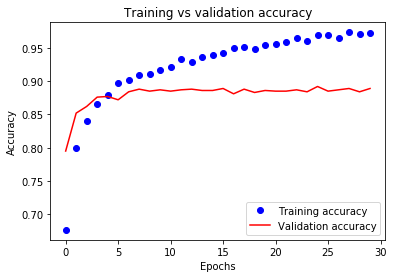

In [34]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(val_acc))
plt.plot(epochs,train_acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'r-',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs validation accuracy')

Text(0.5, 1.0, 'Training vs validation loss')

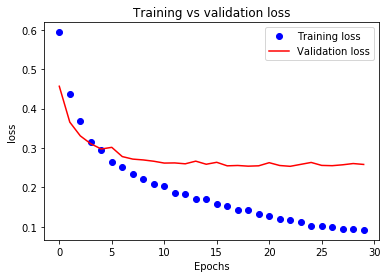

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(val_loss))
plt.plot(epochs,train_loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'r-',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training vs validation loss')

In [36]:
from keras.models import Sequential
from keras import layers
from keras import activations

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
#freezing the conv_base weights
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))
model.summary()

4
4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        shuffle=True,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 14s - loss: 0.6316 - acc: 0.6350 - val_loss: 0.5126 - val_acc: 0.7720
Epoch 2/30
 - 13s - loss: 0.5278 - acc: 0.7600 - val_loss: 0.4290 - val_acc: 0.8020
Epoch 3/30
 - 13s - loss: 0.4637 - acc: 0.7910 - val_loss: 0.3607 - val_acc: 0.8480
Epoch 4/30
 - 13s - loss: 0.4371 - acc: 0.8140 - val_loss: 0.3609 - val_acc: 0.8360
Epoch 5/30
 - 12s - loss: 0.4109 - acc: 0.8060 - val_loss: 0.3115 - val_acc: 0.8580
Epoch 6/30
 - 12s - loss: 0.4178 - acc: 0.8150 - val_loss: 0.3297 - val_acc: 0.8620
Epoch 7/30
 - 12s - loss: 0.3886 - acc: 0.8230 - val_loss: 0.3177 - val_acc: 0.8480
Epoch 8/30
 - 13s - loss: 0.3496 - acc: 0.8540 - val_loss: 0.3141 - val_acc: 0.8680
Epoch 9/30
 - 13s - loss: 0.3663 - acc: 0.8290 - val_loss: 0.2586 - val_acc: 0.8980
Epoch 10/30
 - 13s - loss: 0.3594 - acc: 0.8340 - val_loss: 0.3055 - val_acc: 0.8460
Epoch 11/30
 - 13s - loss: 0.3725 - acc: 0.8350 - val_loss: 0.2636 - val_ac

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 16s - loss: 0.3255 - acc: 0.8570 - val_loss: 0.3860 - val_acc: 0.8520
Epoch 2/30
 - 14s - loss: 0.2930 - acc: 0.8810 - val_loss: 0.2235 - val_acc: 0.9120
Epoch 3/30
 - 14s - loss: 0.2598 - acc: 0.8900 - val_loss: 0.2075 - val_acc: 0.9200
Epoch 4/30
 - 14s - loss: 0.2550 - acc: 0.8900 - val_loss: 0.2145 - val_acc: 0.9200
Epoch 5/30
 - 14s - loss: 0.2546 - acc: 0.8940 - val_loss: 0.2833 - val_acc: 0.9040
Epoch 6/30
 - 14s - loss: 0.2599 - acc: 0.8980 - val_loss: 0.2100 - val_acc: 0.9140
Epoch 7/30
 - 14s - loss: 0.2163 - acc: 0.9080 - val_loss: 0.2168 - val_acc: 0.9260
Epoch 8/30
 - 14s - loss: 0.2173 - acc: 0.8990 - val_loss: 0.1978 - val_acc: 0.9280
Epoch 9/30
 - 14s - loss: 0.2031 - acc: 0.9210 - val_loss: 0.1477 - val_acc: 0.9340
Epoch 10/30
 - 14s - loss: 0.2113 - acc: 0.9110 - val_loss: 0.2152 - val_acc: 0.9340
Epoch 11/30
 - 14s - loss: 0.1692 - acc: 0.9290 - val_loss: 0.2667 - val_acc: 0.9120
Epoch 12/30
 - 14s - loss: 0.1896 - acc: 0.9140 - val_loss: 0.1960 - val_a

Text(0.5, 1.0, 'Training vs validation accuracy')

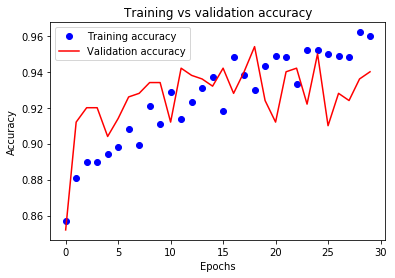

In [41]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(val_acc))
plt.plot(epochs,train_acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'r-',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs validation accuracy')

Text(0.5, 1.0, 'Training vs validation loss')

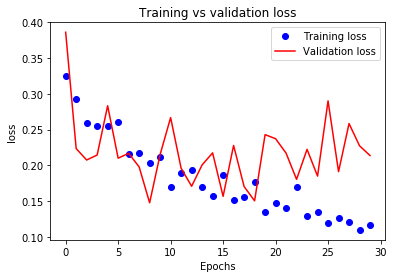

In [42]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(val_loss))
plt.plot(epochs,train_loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'r-',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training vs validation loss')

In [0]:
def smooth_points(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points :
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [0]:
val_loss = smooth_points(val_loss)
train_loss = smooth_points(train_loss)

val_acc = smooth_points(val_acc)
train_acc = smooth_points(train_acc)

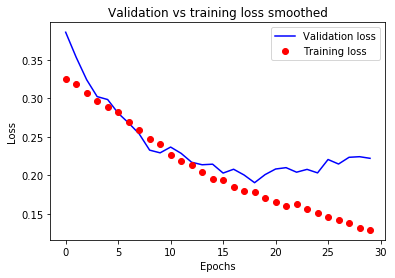

In [53]:
plt.plot(epochs, val_loss, 'b-', label = 'Validation loss')
plt.plot(epochs, train_loss, 'ro', label = 'Training loss')
plt.title('Validation vs training loss smoothed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

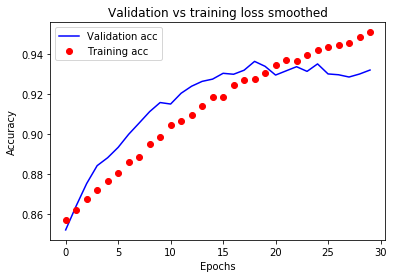

In [54]:
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.plot(epochs, train_acc, 'ro', label = 'Training acc')
plt.title('Validation vs training loss smoothed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
from google.colab import files
!pip install -q kaggle

In [58]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [66]:
!cd ~
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory
